In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clustering-penguins-species/penguins.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/kaggle/input/clustering-penguins-species/penguins.csv')

In [4]:
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [6]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [7]:
data.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [8]:
data=data.dropna()
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [9]:
data[data["sex"]=='.']

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


In [10]:
data=data.drop(336)
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


<Axes: >

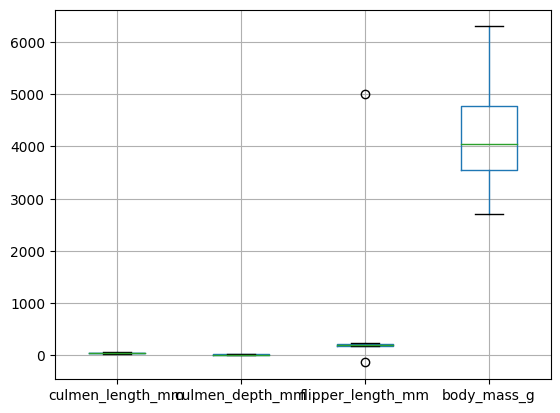

In [11]:
data.boxplot()

In [12]:
data[data["flipper_length_mm"]>4000]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
9,42.0,20.2,5000.0,4250.0,MALE


In [13]:
data[data["flipper_length_mm"]<0]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
14,34.6,21.1,-132.0,4400.0,MALE


In [14]:
data=data.drop([9,14])
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [15]:
df=pd.get_dummies(data)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False
340,46.8,14.3,215.0,4850.0,True,False
341,50.4,15.7,222.0,5750.0,False,True
342,45.2,14.8,212.0,5200.0,True,False


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_standard=pd.DataFrame(data=scaler.fit_transform(df),columns=df.columns)
df_standard

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
...,...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,1.006042,-1.006042
328,0.510432,-1.457611,1.000662,0.799264,1.006042,-1.006042
329,1.171681,-0.742347,1.500134,1.917074,-0.993994,0.993994
330,0.216543,-1.202160,0.786603,1.233968,1.006042,-1.006042


In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
pca_df=pca.fit(df_standard)
pca_df.explained_variance_ratio_

array([5.20340616e-01, 3.44631118e-01, 8.58556863e-02, 3.22911959e-02,
       1.68813837e-02, 3.39957056e-33])

In [18]:
n_components = sum(pca_df.explained_variance_ratio_ > 0.1)
n_components

2

In [19]:
pca = PCA(n_components=n_components)
new_pca=pca.fit_transform(df_standard)
new_pca

array([[-7.18046125e-01, -2.09712541e+00],
       [-1.92706259e+00,  4.08159831e-01],
       [-1.95054409e+00,  3.04877136e-01],
       [-2.28314791e+00, -1.63126559e-01],
       [-6.08571888e-01, -2.51282565e+00],
       [-2.28818870e+00,  1.21278434e-01],
       [ 2.81176770e-01, -1.85240544e+00],
       [-2.33098635e+00,  1.45787626e-01],
       [-5.83196780e-01, -2.65591269e+00],
       [-2.28753186e+00,  1.86238260e-01],
       [-2.03137797e+00,  1.02951885e-02],
       [ 4.14836414e-01, -2.13476803e+00],
       [-2.78172080e+00, -1.49982186e-01],
       [ 3.38409400e-01, -2.45916688e+00],
       [-2.79710550e+00, -2.61527367e-01],
       [-9.58636090e-01, -2.17897634e+00],
       [-2.25475803e+00, -1.52628223e-01],
       [-4.79077278e-01, -1.79048292e+00],
       [-6.25343305e-01, -1.64354027e+00],
       [-2.34715135e+00, -1.13518032e-01],
       [-6.48357307e-01, -2.04177957e+00],
       [-2.23174264e+00,  1.51583994e-01],
       [-3.03923150e+00, -4.56032500e-01],
       [-5.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

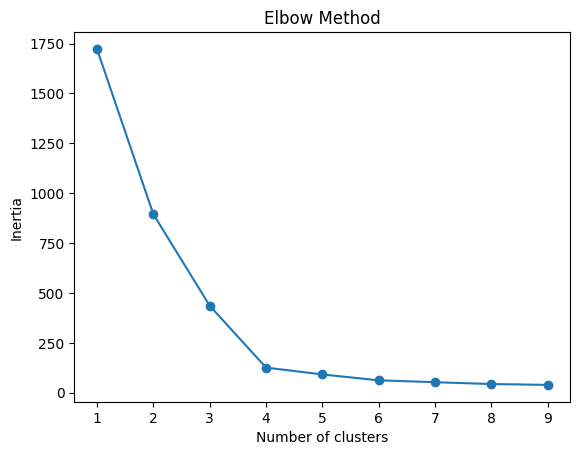

In [20]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,random_state=42).fit(new_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10),inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [21]:
inertia

[1723.0236944266242,
 894.9898977619688,
 436.00646891882195,
 125.81744652188243,
 91.40803162399895,
 62.059406949536516,
 52.59266976461473,
 43.504457206097754,
 38.98163073068823]

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


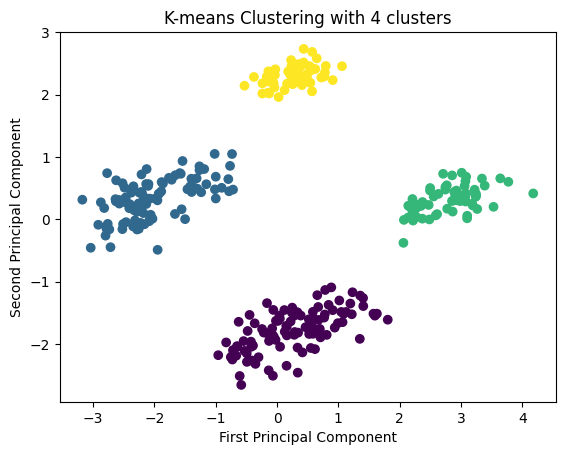

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(new_pca)
plt.scatter(new_pca[:, 0], new_pca[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering with 4 clusters")
plt.show()